# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
X.iloc[35999]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 35999, Length: 784, dtype: float64

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

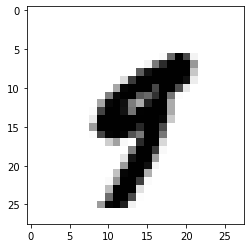

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

image = np.array(X.iloc[36000]).reshape(28, 28)

plt.imshow(image, cmap=matplotlib.cm.binary, interpolation='nearest')

plt.show()

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [5]:
y.iloc[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [6]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [7]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [8]:
y_training5 = np.where(y_train.astype('int') == 5, 1, 0)
y_testing5 = np.where(y_test.astype('int') == 5, 1, 0)

In [9]:
y_testing5

array([0, 0, 0, ..., 0, 1, 0])

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)

In [11]:
clf.fit(X_train, y_training5)

/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### Does the classifier predict correctly the 36000th digit we picked before?

In [12]:
y_train[36000]

'9'

In [13]:
type(y_training5)

numpy.ndarray

In [14]:
clf_preds = clf.predict(X_train)
clf_preds[36000]

0

In [15]:
clf_test_preds = clf.predict(X_test)
clf_test_preds

array([0, 0, 0, ..., 0, 1, 0])

In [16]:
X_test.shape

(10000, 784)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [17]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [18]:
never_5_clf.fit(X_train,y_training5)
never_5_preds = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [19]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_testing5, clf_test_preds)
print(cm)

[[9034   74]
 [ 147  745]]


In [20]:
cm = metrics.confusion_matrix(y_testing5, never_5_preds)
print(cm)

[[9108    0]
 [ 892    0]]


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_testing5, clf_test_preds)
recall = recall_score(y_testing5, clf_test_preds)
f1_score = f1_score(y_testing5, clf_test_preds)
accuracy = accuracy_score(y_testing5, clf_test_preds)
print(precision)
print(recall)
print(f1_score)
print(accuracy)

0.9096459096459096
0.8352017937219731
0.8708357685563999
0.9779


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_testing5, never_5_preds)
recall = recall_score(y_testing5, never_5_preds)
f1_score = f1_score(y_testing5, never_5_preds)
accuracy = accuracy_score(y_testing5, never_5_preds)
print(precision)
print(recall)
print(f1_score)
print(accuracy)

0.0
0.0
0.0
0.9108


/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

We can see the first model is working and not the second. The accuracy show our models are efficient, but the second is efficient for nothing.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

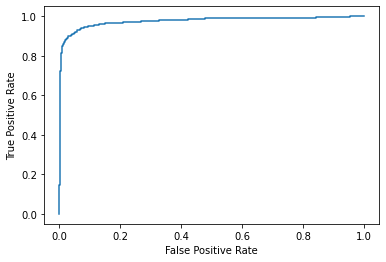

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_testing5, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()



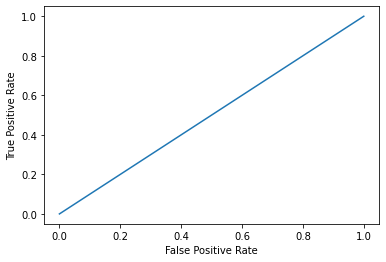

In [34]:
y_score2 = np.zeros(y_testing5.shape[0])

fpr, tpr, _ = roc_curve(y_testing5, y_score2)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### Now find the roc_auc_score for each. 

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_testing5, clf.predict_proba(X_test)[:, 1])

0.9760923231141597

In [36]:
# équivalent
roc_auc_score(y_testing5, y_score)

0.9760923231141597

In [37]:
# deuxième classifier
roc_auc_score(y_testing5, y_score2)

0.5

### What does this metric tell you? Which classifier works better with this metric in mind?

The first classifier is better (ROC = Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.)